![osu logo](./images/osu-32px-horiz.png)
<hr size="6" style="color:#d65828;background-color:#d65828;border:none;">

# Interactive Jupyther Tutorial

### This is a really quick tutorial on how to use Jupyter notebook. 
### GitHub repository: https://github.com/justmarkham/pycon-2018-tutorial 
### Dataset: Stanford Open Policing Project https://openpolicing.stanford.edu/

Once again if you find yourself stuck at any point? Look up jupyter [documentation](https://jupyterlab.readthedocs.io/en/stable/user/notebook.html#notebook).

### Now let's get started!

## 1. Load the data
Pull data from Databases or show excel spreadsheets live! 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# ri stands for Rhode Island
ri = pd.read_csv('police.csv')
# what does each row represent?
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
# what do these numbers mean?
ri.shape

(91741, 15)

## 2. Preprocess the data
We can transform the dataset based on the requirement. Remove the outliers.

In [25]:
# Remove the column that contains missing values
ri.drop('county_name', axis='columns', inplace=True)
ri.shape

(91741, 14)

## 3. Analyze the data
Then we can process the dataset using some machine learing or statistical algorithms.
For example we want to learn how drug activity changes by time of day. 

In [5]:
ri.stop_date.str.slice(0, 4).value_counts()
# make sure you create this column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
# can't groupby 'hour' unless you create it as a column
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

## 4. Plot your result
We can visualize the result with matplotlib.

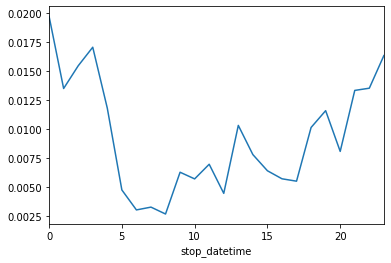

In [6]:
# line plot by default (for a Series)
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

Then let's see what is a better way to present your result.
For example, now we want to analyze the mean stop_duration for each violation_raw.

In [9]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)
# matches value_counts for stop_duration
ri.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [10]:
ri.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


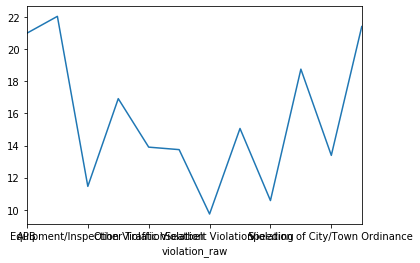

In [22]:
# what's wrong with this?
ri.groupby('violation_raw').stop_minutes.mean().plot()

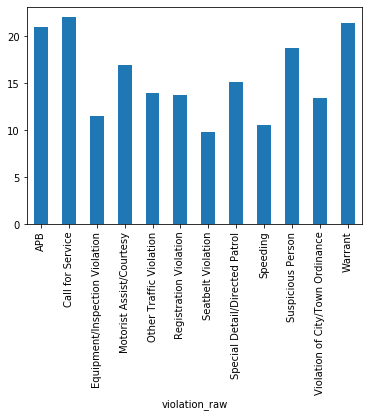

In [23]:
# how could this be made better?
ri.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

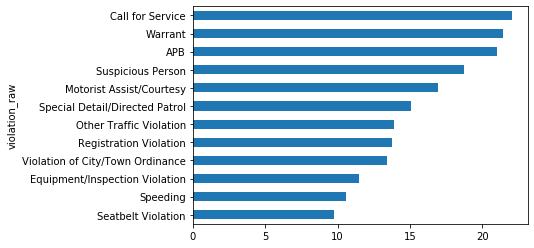

In [21]:
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

Lessons:

- Don't use a line plot to compare categories
- Be conscious of sorting and orientation when plotting